<a href="https://colab.research.google.com/github/HadeerMAli/NLP-Final-Project-Predicting-disaster-tweets-/blob/main/Predicting_disaster_tweets.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Table of Contents:

1- Load the dataset

2- Check head and info of the data

3- missing data [how many and the precentage if there]

4- How many data in each class?

5- Top 15 locations of the data

6- Top 15 keyword in the data

7- Most common words

8- Most common stop words

9- Use nlp to prepare dataset [tokenization, pad sequence, etc.]

10- Prepare train, test sets

11- Training LSTM structure

12- Evaluation of the model and predictions 

# **Dependancies**

In [257]:
# Tokenization of paragraphs/sentences
import nltk
nltk.download("all")

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Pac

True

In [290]:
import pandas as pd
import numpy as np
import re 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import missingno as msno
%matplotlib inline
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))


In [259]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf

#libraries for NLP
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem import WordNetLemmatizer
from wordcloud import WordCloud,STOPWORDS
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import model_selection, metrics, preprocessing, ensemble, model_selection, metrics
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
from tqdm import tqdm
from IPython.display import HTML
!pip install chart_studio
import plotly
import plotly.subplots
import plotly.graph_objs as go
import chart_studio.plotly as py
import plotly.figure_factory as ff
from plotly.offline import iplot
plotly.offline.init_notebook_mode(connected=True)
import cufflinks
cufflinks.go_offline()
cufflinks.set_config_file(world_readable=True, theme='pearl')
import plotly.express as px
from collections import defaultdict
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC

import tensorflow as tf
from tensorflow.keras.layers import Dense, Embedding, LSTM, Dropout,Conv1D, Bidirectional, Dropout, Input
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
import warnings
warnings.filterwarnings('ignore')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [260]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **1- Load the dataset**

In [261]:
# Load Train data 
TRdata = pd.read_csv('/content/drive/MyDrive/Final Project Dataset/train.csv') 
Testdata =pd.read_csv('/content/drive/MyDrive/Final Project Dataset/test.csv') 

# **2- Check head and info of the data**

In [262]:
# check Train data head
TRdata.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [263]:
# check Train data Tail
TRdata.tail()

,id,keyword,location,text,target
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1


In [264]:
TRdata.shape

(7613, 5)

In [265]:
TRdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7613 entries, 0 to 7612
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id        7613 non-null   int64 
 1   keyword   7552 non-null   object
 2   location  5080 non-null   object
 3   text      7613 non-null   object
 4   target    7613 non-null   int64 
dtypes: int64(2), object(3)
memory usage: 297.5+ KB


In [266]:
TRdata.describe()

,id,target
count,7613.000000,7613.00000
mean,5441.934848,0.42966
std,3137.116090,0.49506
min,1.000000,0.00000
25%,2734.000000,0.00000
50%,5408.000000,0.00000
75%,8146.000000,1.00000
max,10873.000000,1.00000


In [267]:
#Count of duplicate values 
TRdata.duplicated().sum()

0

# **3- Missing data**   
# **AND** 

# **4- Data in each class**

In [268]:
TRdata.isna().sum()

id             0
keyword       61
location    2533
text           0
target         0
dtype: int64

In [269]:
percent_missing = TRdata.isnull().sum() * 100 / len(TRdata)
missing_value_df = pd.DataFrame({'column_name': TRdata.columns,
                                 'percent_missing': percent_missing})
percent_missing
missing_value_df

id           0.000000
keyword      0.801261
location    33.272035
text         0.000000
target       0.000000
dtype: float64

,column_name,percent_missing
id,id,0.000000
keyword,keyword,0.801261
location,location,33.272035
text,text,0.000000
target,target,0.000000


Text(0.5, 1.0, 'Missing data for each column')

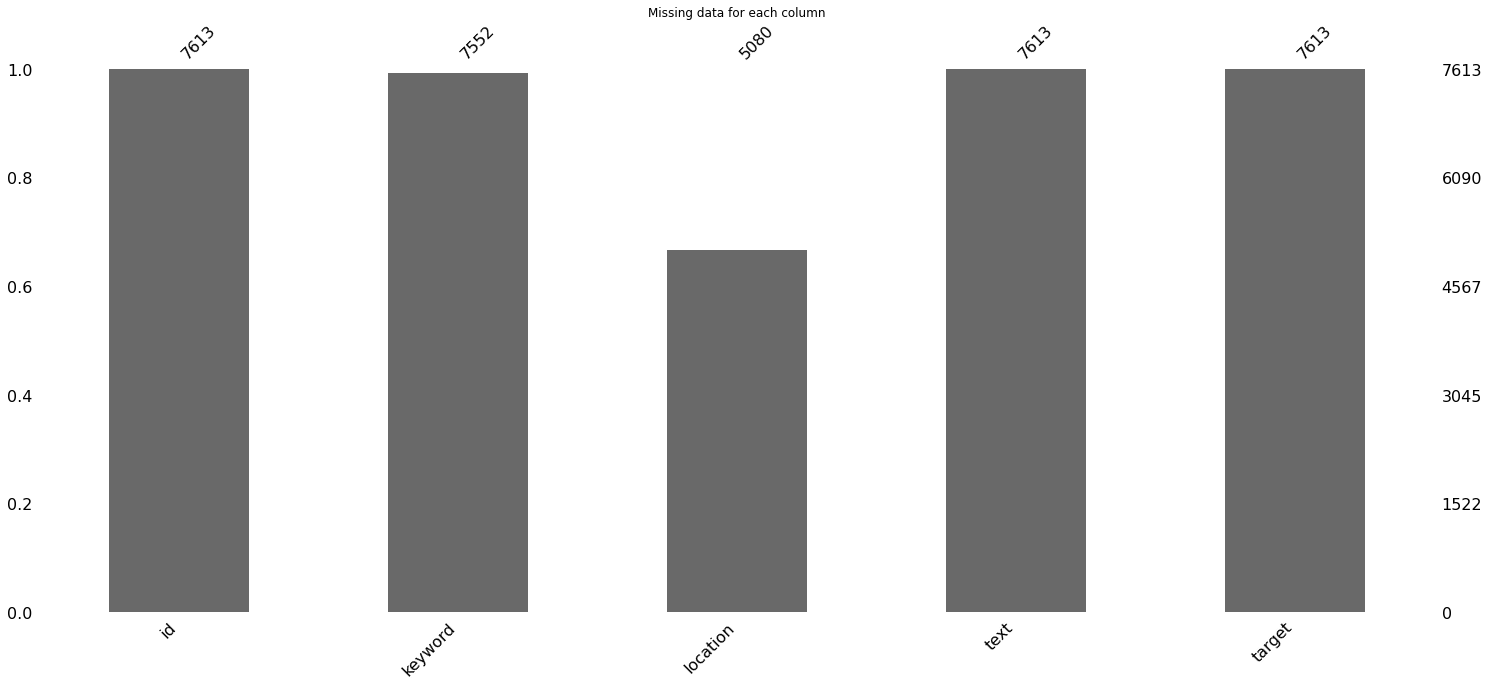

In [270]:
msno.bar(TRdata).set_title("Missing data for each column")


Text(0.5, 1.0, 'Missing data for each column')

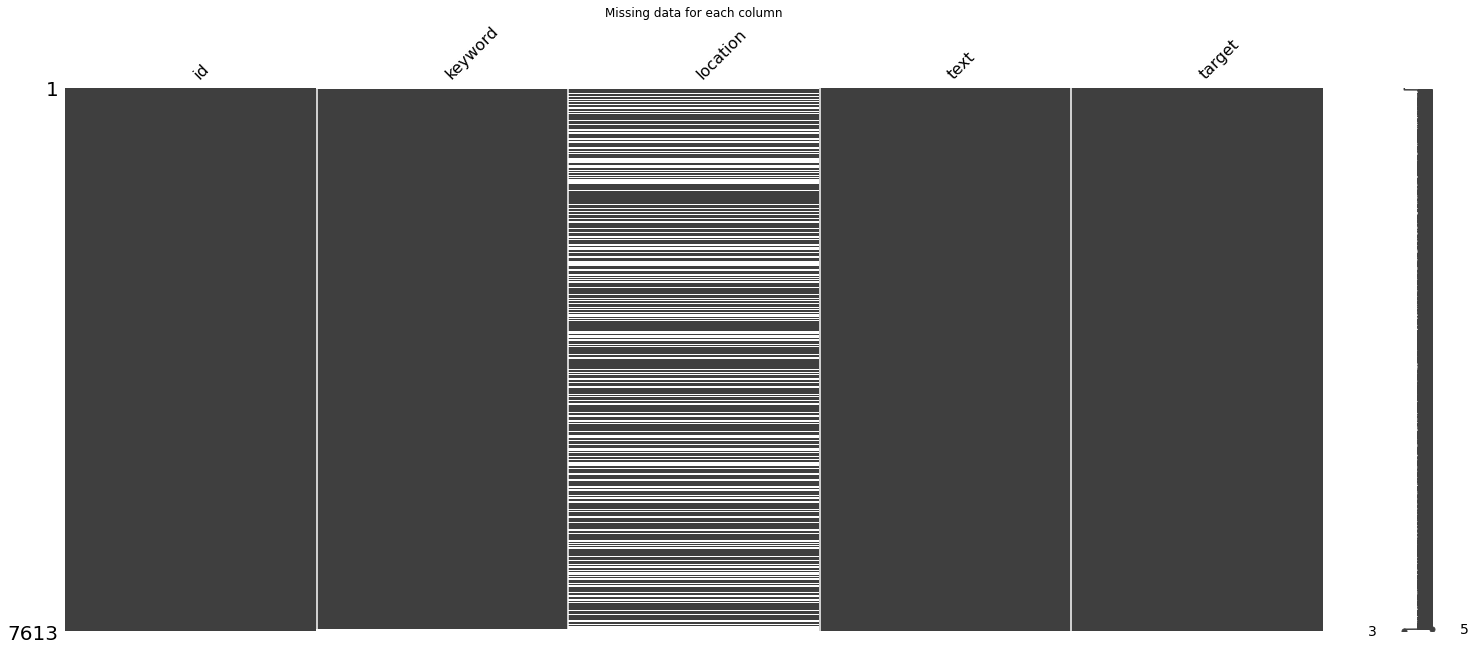

In [271]:
msno.matrix(TRdata).set_title("Missing data for each column")

Text(0.5, 1.0, 'Missing data for each column')

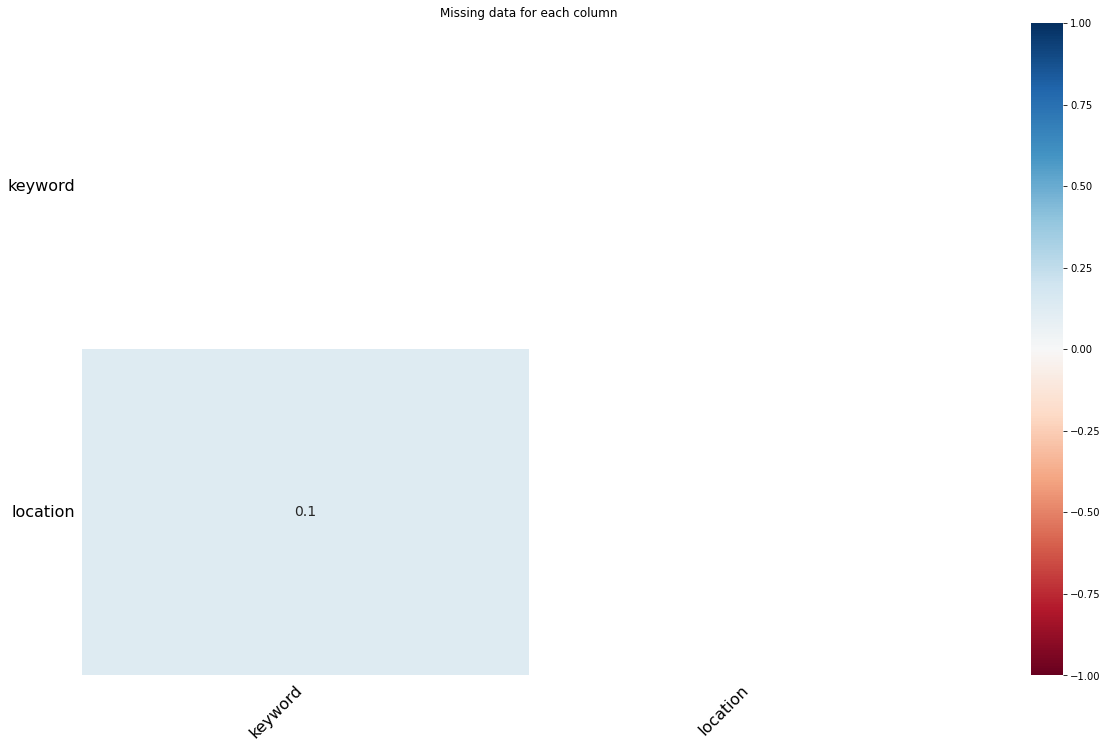

In [272]:
msno.heatmap(TRdata).set_title("Missing data for each column")

# **5- Top 15 locations of the data**

In [273]:
TRdata["location"].nunique()

3341

In [274]:
TRdata.location.value_counts()[:].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
...,...
"MontrÌ©al, QuÌ©bec",1
Montreal,1
"ÌÏT: 6.4682,3.18287",1
Live4Heed??,1


In [275]:
TRdata.location.value_counts()[:15].to_frame()

,location
USA,104
New York,71
United States,50
London,45
Canada,29
Nigeria,28
UK,27
"Los Angeles, CA",26
India,24
Mumbai,22


Text(0.5, 1.0, 'Top 15 locations')

Text(0.5, 0, 'Count of locations')

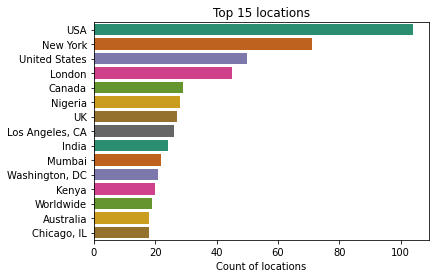

In [276]:
word_plot=TRdata['location'].value_counts()[:15]
sns.barplot(x=word_plot,y=word_plot.index,palette='Dark2')
plt.title("Top 15 locations")
plt.xlabel("Count of locations")

# **6- Top 15 keyword in the data**

In [277]:
TRdata["keyword"].nunique()

221

In [278]:
TRdata.keyword.value_counts()[:].to_frame()

,keyword
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
...,...
forest%20fire,19
epicentre,12
threat,11
inundation,10


In [279]:
TRdata.keyword.value_counts()[:15].to_frame()

,keyword
fatalities,45
deluge,42
armageddon,42
sinking,41
damage,41
harm,41
body%20bags,41
outbreak,40
evacuate,40
fear,40


Text(0.5, 1.0, 'Top 15 Keywords')

Text(0.5, 0, 'Count of Keywords')

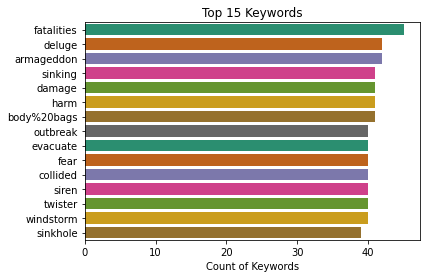

In [280]:
word_plot=TRdata['keyword'].value_counts()[:15]
sns.barplot(x=word_plot,y=word_plot.index,palette='Dark2')
plt.title("Top 15 Keywords")
plt.xlabel("Count of Keywords")

In [281]:
# Unique Words
X = TRdata["text"] # indpendent feature
def uniq_words(sentence):
  uniq_words_list = []
  for sent in tqdm(sentence):
    for word in sent.split():
      if word.lower() not in uniq_words_list:
        uniq_words_list.append(word.lower())
      else:
        pass
  return uniq_words_list
unique_words = uniq_words(X)
print("Total unique words present :",len(unique_words))

100%|██████████| 7613/7613 [00:33<00:00, 226.41it/s]

Total unique words present : 27983


In [282]:
unique_words[:15]

['our',
 'deeds',
 'are',
 'the',
 'reason',
 'of',
 'this',
 '#earthquake',
 'may',
 'allah',
 'forgive',
 'us',
 'all',
 'forest',
 'fire']

# **7- Most common words**

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Top 15 words')

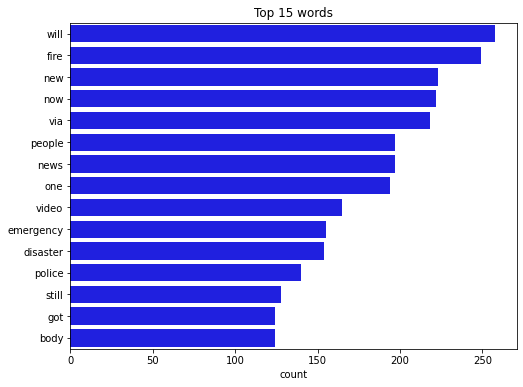

In [283]:
from nltk import FreqDist, word_tokenize
stopwords = set(STOPWORDS)
more_stopwords = {'https', 'amp'}
stopwords = stopwords.union(more_stopwords)

word_freq = FreqDist(w for w in word_tokenize(' '.join(TRdata['text']).lower()) if
       (w not in stopwords) & (w.isalpha()))
df_word_freq = pd.DataFrame.from_dict(word_freq, orient='index', columns=['count'])
top15w = df_word_freq.sort_values('count',ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(top15w['count'], top15w.index, color='blue')
plt.title('Top 15 words')
plt.show()

# **8- Most common stop words**

<Figure size 576x432 with 0 Axes>

Text(0.5, 1.0, 'Top 15 stop words')

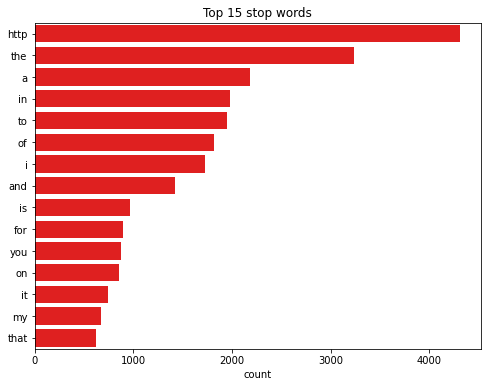

In [284]:
stopw_freq = FreqDist(w for w in word_tokenize(' '.join(TRdata['text']).lower()) if
       (w  in stopwords) & (w.isalpha()))
                       

       
df_stopw_freq = pd.DataFrame.from_dict(stopw_freq, orient='index', columns=['count'])
top15sw = df_stopw_freq.sort_values('count',ascending=False).head(15)

plt.figure(figsize=(8,6))
sns.barplot(top15sw['count'], top15sw.index, color='red')
plt.title('Top 15 stop words')
plt.show()

# **Counts and plots of Disaster and Non-Disaster Tweets**

,target
0,4342
1,3271


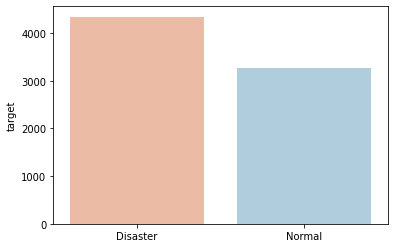

In [285]:
# Plotting target value counts for Disaster and Non-Disaster Tweets
barfig=TRdata['target'].value_counts().to_frame()

## seaborn barplot to display barchart
sns.barplot(data=barfig,x=["Disaster","Normal"],y="target",palette="RdBu")
barfig

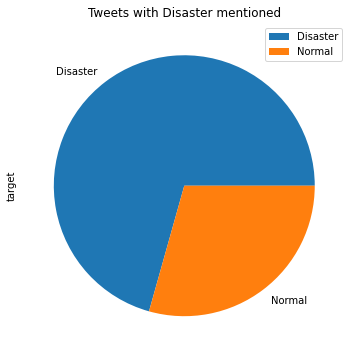

In [286]:
TRdata[TRdata.text.str.contains("disaster")].target.value_counts().to_frame().rename(index={1:"Disaster",0:"Normal"}).\
  plot.pie(y="target",figsize=(12,6),title="Tweets with Disaster mentioned");

# **9- nlp to prepare dataset [tokenization, pad sequence, etc.]**

In [287]:
#only use text and target column for rest of the code as there are a lot of null values inside the other columns

#TRdata = TRdata[['text','target']]
#TRdata.head()

In [288]:
# Clean text columns
stemmer = SnowballStemmer('english')


def preprocess_data(data):
    
    #removal of url
    text = re.sub(r'https?://\S+|www\.\S+|http?://\S+',' ',data) 
    
    #decontraction
    text = re.sub(r"won\'t", " will not", text)
    text = re.sub(r"won\'t've", " will not have", text)
    text = re.sub(r"can\'t", " can not", text)
    text = re.sub(r"don\'t", " do not", text)    
    text = re.sub(r"can\'t've", " can not have", text)
    text = re.sub(r"ma\'am", " madam", text)
    text = re.sub(r"let\'s", " let us", text)
    text = re.sub(r"ain\'t", " am not", text)
    text = re.sub(r"shan\'t", " shall not", text)
    text = re.sub(r"sha\n't", " shall not", text)
    text = re.sub(r"o\'clock", " of the clock", text)
    text = re.sub(r"y\'all", " you all", text)
    text = re.sub(r"n\'t", " not", text)
    text = re.sub(r"n\'t've", " not have", text)
    text = re.sub(r"\'re", " are", text)
    text = re.sub(r"\'s", " is", text)
    text = re.sub(r"\'d", " would", text)
    text = re.sub(r"\'d've", " would have", text)
    text = re.sub(r"\'ll", " will", text)
    text = re.sub(r"\'ll've", " will have", text)
    text = re.sub(r"\'t", " not", text)
    text = re.sub(r"\'ve", " have", text)
    text = re.sub(r"\'m", " am", text)
    text = re.sub(r"\'re", " are", text)
    
    #removal of html tags
    text = re.sub(r'<.*?>',' ',text) 
    
    # Match all digits in the string and replace them by empty string
    text = re.sub(r'[0-9]', '', text)
    text = re.sub("["
                           u"\U0001F600-\U0001F64F"  # removal of emotions
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+",' ',text)
    
    # filtering out miscellaneous text.
    text = re.sub('[^a-zA-Z]',' ',text) 
    text = re.sub(r"\([^()]*\)", "", text)
    
    # remove mentions
    text = re.sub('@\S+', '', text)  
    
    # remove punctuations
    text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), '', text)  
    

    # Lowering all the words in text
    text = text.lower()
    text = text.split()
    
    text = [stemmer.stem(words) for words in text if words not in stopwords.words('english')]
    
    # Removal of words with length<2
    text = [i for i in text if len(i)>2] 
    text = ' '.join(text)
    return text

In [291]:
TRdata["Cleaned_text"] = TRdata["text"].apply(preprocess_data)
TRdata.head()

,id,keyword,location,text,target,Cleaned_text
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1,deed reason earthquak may allah forgiv
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1,forest fire near rong sask canada
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1,resid ask ishelt place notifi offic evacu shel...
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1,peopl receiv wildfir evacu order california
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1,got sent photo rubi alaska smoke wildfir pour ...


In [292]:
TRdata.tail()

,id,keyword,location,text,target,Cleaned_text
7608,10869,NaN,NaN,Two giant cranes holding a bridge collapse int...,1,two giant crane hold bridg collaps nearbi home
7609,10870,NaN,NaN,@aria_ahrary @TheTawniest The out of control w...,1,aria ahrari thetawniest control wild fire cali...
7610,10871,NaN,NaN,M1.94 [01:04 UTC]?5km S of Volcano Hawaii. htt...,1,utc volcano hawaii
7611,10872,NaN,NaN,Police investigating after an e-bike collided ...,1,polic investig bike collid car littl portug bi...
7612,10873,NaN,NaN,The Latest: More Homes Razed by Northern Calif...,1,latest home raze northern california wildfir a...


In [293]:
Testdata["Cleaned_text"] = TRdata["text"].apply(preprocess_data)

# **10- Prepare train, test sets**

In [338]:
max_features=3000
tokenizer=Tokenizer(num_words=max_features,split=' ')
tokenizer.fit_on_texts(TRdata['Cleaned_text'].values)
X = tokenizer.texts_to_sequences(TRdata['Cleaned_text'].values)
X = pad_sequences(X)
X.shape

(7613, 20)

In [294]:
text = TRdata["Cleaned_text"].tolist()
text_test = Testdata["Cleaned_text"].tolist()
text[:3] # Analysing first 3 sentence in train data.

['deed reason earthquak may allah forgiv',
 'forest fire near rong sask canada',
 'resid ask ishelt place notifi offic evacu shelter place order expect']

In [295]:
from tensorflow.keras.preprocessing.text import Tokenizer
token = Tokenizer()
token.fit_on_texts(text)

In [296]:
# Finding the vocab size
vocab_size = len(token.word_index)+1
print("The vocabulary size is : {}".format(vocab_size))

The vocabulary size is : 12794


In [297]:
# Encoding tokens in words to numerical formats
encoded_text = token.texts_to_sequences(text)
encoded_text_test = token.texts_to_sequences(text_test)
encoded_text[:2]

[[3536, 458, 208, 88, 1315, 2816], [138, 2, 103, 5074, 5075, 1015]]

In [298]:
#Considering 120 words
max_length = 120 # Considering top 120 tokens.
X = pad_sequences(encoded_text,maxlen=max_length,padding='post') # This is done to make the sequence of same length.
X_test = pad_sequences(encoded_text_test,maxlen=max_length,padding='post')
X

array([[3536,  458,  208, ...,    0,    0,    0],
       [ 138,    2,  103, ...,    0,    0,    0],
       [1316,  509, 5076, ...,    0,    0,    0],
       ...,
       [ 609,  405, 1307, ...,    0,    0,    0],
       [  30,  170, 1905, ...,    0,    0,    0],
       [ 171,   28,  389, ...,    0,    0,    0]], dtype=int32)

In [299]:
%%time
#declaring dict to store all the words as keys in the dictionary and their vector representations as values
glove_vectors = dict()

# Now, we will convert the words in glove vectors into key value pairs. We have used glove representation of 200D. 


file = open('/glove.6B.100d.txt',encoding='utf-8')

for line in file:
    values = line.split()  # contains list of keys and their vectors
    word = values[0] # contains words
    vectors = np.asarray(values[1:]) # storing vectors
    glove_vectors[word] = vectors #storing the vector representation of the respective word in the dictionary
file.close()

CPU times: user 10.1 s, sys: 1.99 s, total: 12 s
Wall time: 12.1 s


In [300]:
# Checking length of glove vectors
print("The maximum size of global vectors is : {}".format(len(glove_vectors)))

The maximum size of global vectors is : 400000


In [301]:
# Checking dimensions of Glove Vectors.
glove_vectors.get('you').shape

(100,)

In [302]:
# Now we are creating a matrix for the tokens which we are having in our dataset and then storing their vector representation values in the matrix if it matches with glove_vectors words else print the misspelled words or words which are not present.

word_vector_matrix = np.zeros((vocab_size,100))  # size of the word matrix
for word,index in token.word_index.items():
    vector = glove_vectors.get(word)
    if vector is not None:
        word_vector_matrix[index] = vector
    #else:
        #print(word)

In [303]:
print("The Size of Word Matrix is :{}".format(word_vector_matrix.shape))


The Size of Word Matrix is :(12794, 100)


In [304]:
# Dividing the data into training, validation and testing
from sklearn.model_selection import train_test_split
# for bow and tf-idf
#x_train, x_test, y_train, y_test = train_test_split(x_final, y_final, test_size=0.1, random_state=42, stratify = y_final)
#X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
#x_test_final = x_test_final

#  for Word Embeddings
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify = y)
X_train, x_valid, Y_train, y_valid = train_test_split(x_train, y_train, test_size=0.1, random_state=42, stratify = y_train)
#x_test_final = x_test_final

In [305]:
from tensorflow.keras import regularizers

embedding_feature_vector = 100 # Since we used glove vector embedding of dim 100.
model = Sequential()
model.add(Embedding(vocab_size,embedding_feature_vector,input_length=max_length,weights = [word_vector_matrix], trainable = False))
model.add(Dropout(0.35))
model.add(LSTM(100))
model.add(Dropout(0.35))
model.add(Dense(32,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer=Adam(lr=1e-4),metrics=['accuracy'])
print(model.summary())

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 120, 100)          1279400   
                                                                 
 dropout_6 (Dropout)         (None, 120, 100)          0         
                                                                 
 lstm_5 (LSTM)               (None, 100)               80400     
                                                                 
 dropout_7 (Dropout)         (None, 100)               0         
                                                                 
 dense_6 (Dense)             (None, 32)                3232      
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,363,065
Trainable params: 83,665
Non-

In [308]:
#from tensorflow.keras.callbacks import *
n_epoch = 30

early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1, 
                           mode='min', restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.1, patience=5, 
                              verbose=1, mode='min')

# **11- Train your LSTM structure** 

In [309]:
# Training the model
history = model.fit(X_train,Y_train,validation_data=(x_valid,y_valid),callbacks=[reduce_lr,early_stop],epochs=n_epoch,batch_size= 64)

Epoch 1/30
97/97 [==============================] - 16s 161ms/step - loss: 0.5026 - accuracy: 0.7689 - val_loss: 0.4718 - val_accuracy: 0.7886 - lr: 1.0000e-04
Epoch 2/30
97/97 [==============================] - 16s 161ms/step - loss: 0.5003 - accuracy: 0.7679 - val_loss: 0.4708 - val_accuracy: 0.7886 - lr: 1.0000e-04
Epoch 3/30
97/97 [==============================] - 16s 160ms/step - loss: 0.5042 - accuracy: 0.7715 - val_loss: 0.4793 - val_accuracy: 0.7784 - lr: 1.0000e-04
Epoch 4/30
97/97 [==============================] - 16s 160ms/step - loss: 0.4967 - accuracy: 0.7762 - val_loss: 0.4713 - val_accuracy: 0.7915 - lr: 1.0000e-04
Epoch 5/30
97/97 [==============================] - 16s 160ms/step - loss: 0.4983 - accuracy: 0.7784 - val_loss: 0.4731 - val_accuracy: 0.7872 - lr: 1.0000e-04
Epoch 6/30
97/97 [==============================] - 16s 160ms/step - loss: 0.4944 - accuracy: 0.7750 - val_loss: 0.4674 - val_accuracy: 0.7857 - lr: 1.0000e-04
Epoch 7/30
97/97 [======================

<Figure size 720x288 with 0 Axes>

Text(0.5, 0.98, 'Train Accuracy vs Train Loss')

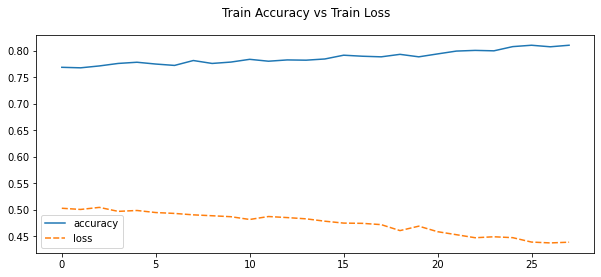

In [333]:
# Plot train accuracy and loss
accuraties = history.history['accuracy']
losses = history.history['loss']
accuraties_losses = list(zip(accuraties,losses))

accuraties_losses_df = pd.DataFrame(accuraties_losses, columns={"accuracy", "loss"})

plt.figure(figsize=(10,4))
plt.suptitle("Train Accuracy vs Train Loss")
sns.lineplot(data=accuraties_losses_df)
plt.show()

# **12- Evaluation of the model and predictions**

In [339]:
#Evaluate the model
predicted = model.predict(X_test, verbose=1, batch_size=10000)

y_predicted = [1 if each > 0.5 else 0 for each in predicted]

score, test_accuracy = model.evaluate(X_test, y_test, batch_size=10000)

print("Test Accuracy: ", test_accuracy)
print(metrics.classification_report(list(y_test), y_predicted))

1/1 [==============================] - 0s 40ms/step


ValueError: ignored

In [328]:
# Plot confusion matrix
conf_matrix = metrics.confusion_matrix(y_test, y_predicted)

fig, ax = plt.subplots()
sns.heatmap(conf_matrix, cbar=False, cmap='Reds', annot=True, fmt='d')
ax.set(xlabel="Predicted Value", ylabel="True Value", title="Confusion Matrix")
ax.set_yticklabels(labels=['0', '1'], rotation=0)
plt.show()

NameError: ignored

In [324]:
predictions = model.predict_classes(x_test)
cr = classification_report(y_test,predictions)
print(cr)

AttributeError: ignored

# **Conclusion**

# ** it appears that LSTM model achieved an overall accuracy of about 82.02%**

# **13- Reference**

https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/text/Tokenizer

https://colah.github.io/posts/2015-08-Understanding-LSTMs/

https://nlp.stanford.edu/projects/glove/

https://www.kaggle.com/datasets/danielwillgeorge/glove6b100dtxt
